<a href="https://colab.research.google.com/github/thialescavalcante/Analise-de-dados/blob/main/Analise_de_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#	Etapa 1: Preparação do Ambiente e Carregamento de Dados

In [2]:
# 1. Importe as bibliotecas necessárias no início do seu script ou notebook.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("Bibliotecas importadas com sucesso!")

Bibliotecas importadas com sucesso!


In [5]:
# 2. Carregar Dados

# Caminho onde está o arquivo com os dados

caminho_arquivo = "/content/drive/MyDrive/Colab Notebooks/12 RP07 Análise de Dados com Python.xlsx"

try:
    df = pd.read_excel(caminho_arquivo)
    print("\nArquivo (caminho_arquivo.split('/')[-1]) carregado con sucesso en un DataFrame!")

    # Exiba as primeiras linhas do DataFrame (head()) para uma primeira inspeção.
    print("\nPrimeiras 10 linhas do DataFrame:")
    print(df.head(10))

    # Exiba suas informações gerais (.info()) para una primeira inspeção.
    print("\nInformações gerais do DataFrame:")
    df.info()

except FileNotFoundError:
    print("\nERRO: O arquivo não foi encontrado no caminho especificado: (caminho_arquivo)")
    print("Por favor, verifique se o caminho e o nome do arquivo estão corretos e se você montou seu Google Drive no colab (se aplicável).")
except Exception as e:
    print(f"\nOcorreu un erro ao carregar o arquivo: (e)")


Arquivo (caminho_arquivo.split('/')[-1]) carregado con sucesso en un DataFrame!

Primeiras 10 linhas do DataFrame:
         ID_Pedido Data_Pedido ID_Cliente     Segmento           Regiao  \
0   CA-2012-124891  2012-07-31   RH-19495   Consumidor         New York   
1    IN-2013-77878  2013-02-05   JR-16210  Corporativo  New South Wales   
2    IN-2013-71249  2013-10-17   CR-12730   Consumidor       Queensland   
3  ES-2013-1579342  2013-01-28   KM-16375  Home Office           Berlin   
4     SG-2013-4320  2013-11-05    RH-9495   Consumidor            Dakar   
5    IN-2013-42360  2013-06-28   JM-15655  Corporativo  New South Wales   
6    IN-2011-81826  2011-11-07   TS-21340   Consumidor       Wellington   
7    IN-2012-86369  2012-04-14   MB-18085   Consumidor          Waikato   
8   CA-2014-135909  2014-10-14   JW-15220  Corporativo       California   
9   CA-2012-116638  2012-01-28   JH-15985   Consumidor   North Carolina   

            Pais        Product ID    Categoria SubCategor

# Etapa 2: Limpeza e Pré-processamento de Dados
# Objetivo: Tratar inconsistências e preparar os dados para análise.

In [6]:
print("\n" + '-'*50)
print("Iniciando Etapa 2: Limpeza e Pré-processamento de Dados")
print("="*50)

# Antes de começar, vamos fazer una cópla do Datafrase original para não alterar o DF da Etapa 1
df_limpo = df.copy()
print("\nCópia do DataFrame original criada para limpeza (df_limpo).")


# 1. Renomear Colunas (opcional):
# Padronize nomes de colunas para facilitar o acesso (ex: remover espaços, caracteres especials).
# Vamos inspecionar os nomes atuais para decidir o que fazer.
print("\nNomes originais das colunas:")
print(df_limpo.columns.tolist())

# Exemplo de renomeação: converter para minúsculas e substituir espaços por underscores.
# Você pode ajustar esta lista conforme a necessidade real dos seus nomes de coluna.
novos_nomes_colunas = {col: col.replace(' ','_').replace('.','').lower() for col in df_limpo.columns}
df_limpo.rename (columns=novos_nomes_colunas, inplace = True)

print("\nNones das colunas após renomeação (se houver):")
print(df_limpo.columns.tolist())


--------------------------------------------------
Iniciando Etapa 2: Limpeza e Pré-processamento de Dados

Cópia do DataFrame original criada para limpeza (df_limpo).

Nomes originais das colunas:
['ID_Pedido', 'Data_Pedido', 'ID_Cliente', 'Segmento', 'Regiao', 'Pais', 'Product ID', 'Categoria', 'SubCategoria', 'Total_Vendas', 'Quantidade', 'Desconto', 'Lucro', 'Prioridade']

Nones das colunas após renomeação (se houver):
['id_pedido', 'data_pedido', 'id_cliente', 'segmento', 'regiao', 'pais', 'product_id', 'categoria', 'subcategoria', 'total_vendas', 'quantidade', 'desconto', 'lucro', 'prioridade']


In [7]:
# 2. Verificar Valores Ausentes:
print("\nVerificando valores ausentes no DataFrame:")
valores_nulos = df_limpo.isnull().sum()
print (valores_nulos [valores_nulos > 0]) # Exibe apenas colunas com valores nulos

for coluna in valores_nulos [valores_nulos > 0].index:
     if df_limpo[coluna].dtype == 'object': # Se for uma coluna de texto/categórica
         df_limpo [coluna].fillna('Desconhecido', inplace=True)
         print(f"Preenchido valores nulos na coluna '{coluna}' com 'Desconhecido'.")

     elif pd.api.types.is_numeric_dtype(df_limpo [coluna]):
         df_limpo [coluna].fillna(0, inplace=True) # Preenchedo com valor 0
         print(f"Preenchido valores nulos na coluna '{coluna}' com 0.")

     else:
        print(f"Coluna '{coluna}' possui nulos, mas não foi tratada automaticamente (necessita análise específica).")

print("\nValores ausentes após tratamento (se houver):")
print(df_limpo.isnull().sum() [df_limpo.isnull().sum() > 0])


Verificando valores ausentes no DataFrame:
Series([], dtype: int64)

Valores ausentes após tratamento (se houver):
Series([], dtype: int64)


In [8]:
# 3. Converter Tipos de Dados:
print("\nverificando e convertendo tipos de dados:")
print("Tipos de dados antes da conversão:")
print(df_limpo.info())

# 3.1. Converter colunas numéricas (ex: total_vendas, quantidade, desconto, lucro)
colunas_numericas_para_converter = ['total_vendas', 'quantidade', 'desconto', 'lucro']
for coluna in colunas_numericas_para_converter:
    if coluna in df_limpo.columns:
        # Ponto de Atenção: A conversão de números pode exigir a substituição de virgulas por pontos

        # A coluna Desconto pode ter valores como 's' ou vazios.
        if df_limpo[coluna].dtype == 'object': # Se a coluna for de objeto (string)
          #Substitui virgulas por pontos e tenta converter para numérico.
          #Coerces erros (como 's' ou vazios) para NaN, que pode ser tratado depois.
          df_limpo[coluna] = df_limpo[coluna].astype(str).str.replace(',','', regex=False)
          df_limpo[coluna] = pd.to_numeric(df_limpo(coluna), errors='coerce')
          # Após a conversão, preenche NaNs criados por 'coerce' com 0 (ou outra estratégia)
          df_limpo [coluna].fillna(0, inplace=True)
          print(f"Coluna (coluna) convertida para numérico (float) e NaN/erros preenchidos com 0.")
        elif pd.api.types.is_numeric_dtype(df_limpo[coluna]) and df_limpo [coluna].dtype != 'float64':
          # Se já é numérico mas não float (ex: int), assegura que é float para consistência
          df_limpo[coluna] = df_limpo [coluna].astype (float)
          print (f"Coluna (coluna) convertida para float.")
    else:
        print(f"Aviso: Coluna (coluna) não encontrada no DataFrame para conversão numérica.")

# 3.2. Converter a coluna data pedido para o tipo datetime.
coluna_data = 'data_pedido' # Adapte conforme o nome real da sua coluna de data
if coluna_data in df_limpo.columns:
    df_limpo[coluna_data] = pd.to_datetime(df_limpo[coluna_data], errors='coerce')
    #Tratar possíveis NaNs criados por datas inválidas
    if df_limpo[coluna_data].isnull().sum() > 0:
      print(f"Atenção: [df_limpo[coluna_data].isnull().sum()) valores inválidos na coluna (coluna_data) foram convertidos para Nat (Not a Time).")
      # Você pode remover essas linhas ou preenchê-las com uma data padrão, dependendo da sua análise.
      # df_limpo.dropna(subset=[coluna_data], inplace=True) # Exemplo: remover linhas com datas inválidas
    print(f"Coluna ' {coluna_data}' convertida para tipo datetime.")
else:
    print(f"Aviso: Coluna (coluna data) não encontrada no DataFrame para conversão de data.")

print("\nTipos de dados após a conversão:")
print(df_limpo.info())


verificando e convertendo tipos de dados:
Tipos de dados antes da conversão:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id_pedido     51290 non-null  object        
 1   data_pedido   51290 non-null  datetime64[ns]
 2   id_cliente    51290 non-null  object        
 3   segmento      51290 non-null  object        
 4   regiao        51290 non-null  object        
 5   pais          51290 non-null  object        
 6   product_id    51290 non-null  object        
 7   categoria     51290 non-null  object        
 8   subcategoria  51290 non-null  object        
 9   total_vendas  51290 non-null  float64       
 10  quantidade    51290 non-null  int64         
 11  desconto      51290 non-null  float64       
 12  lucro         51290 non-null  float64       
 13  prioridade    51290 non-null  object        
dtypes: datet

In [ ]:
# 4. Tratar Duplicatas:
print("\nVerificando e tratando duplicatas:")
duplicatas = df_limpo.duplicated().sum()
if duplicatas > 0:
    print(f"Número de linhas duplicadas encontradas: {duplicatas}")
    df_limpo.drop_duplicates (inplace=True)
    print(f"Duplicatas removidas. Novo número de linhas: {len(df_limpo)}")
else:
    print("Nenhuma linha duplicada encontrada.")


print("\n" + "="*50)
print("Etapa 2: Limpeza e Pré-processamento de Dados CONCLUIDA!")
print("="*50)

# Exiba as primeiras linhas do DataFrame após a limpeza para uma verificação final
print("\nPrimeiras 5 linhas do DataFrame após a limpeza:")
print(df_limpo.head())

# Etapa 3: Análise Exploratória de Dados (EDA) e Respostas às Perguntas de Negócio

In [ ]:
print("\n" + "="*50)
print("Iniciando Etapa 3: Análise Exploratória de Dados (EDA)")
print("="*50)

# 1. Total de Vendas Acumulado:
print("\n--- 1. Total de Vendas Acumulado ---")
if pd.api.types.is_numeric_dtype(df_limpo['total_vendas']):
    total_vendas_acumulado = df_limpo['total_vendas'].sum()
    print(f"Total de Vendas Acumulado: R$ {total_vendas_acumulado:,.2f}")
else:
    print("A coluna 'total_vendas não é numérica. Verifique a Etapa 2.")

# 2. Categorias de Produtos Mais Vendidas:
print("\n--- 2. Categorias de Produtos Mais Vendidas ---")
# Agrupe os dados por Categoria e some Total Vendas.
vendas_por_categoria = df_limpo.groupby('categoria') ['total_vendas'].sum().sort_values(ascending=False)
print("Vendas por Categoria (Top 10):")
print (vendas_por_categoria.head (10).apply(lambda x: f"R$ {x:,.2f}"))

In [ ]:
# 3. Prioridade de Entrega vs. Vendas por País:
print("\n--- 3. Prioridade de Entrega vs. Vendas por País ---")
# Agrupe os dados por País e Prioridade, somando Total Vendas.
vendas_por_pais_prioridade = df_limpo.groupby (['pais', 'prioridade']) ['total_vendas'].sum().unstack(fill_value=0)
print("Vendas por País e Prioridade de Entrega:")
print (vendas_por_pais_prioridade.applymap(lambda x: f"R$ {x:,.2f}"))

# 4. Impacto dos Descontos nas Subcategorias:
print("\n-- 4. Impacto dos Descontos nas Subcategorias ---")
# Agrupe os dados por SubCategoria e calcule a média do Desconto e a soma de Total Vendas.
impacto_desconto_subcategoria = df_limpo.groupby('subcategoria').agg(
    desconto_medio=('desconto', 'mean'),
    total_vendas=('total_vendas', 'sum')
).sort_values (by='total_vendas', ascending=False)

print("Impacto dos Descontos e Vendas por Subcategoria (Top 10):")
impacto_desconto_subcategoria['desconto_medio'] = impacto_desconto_subcategoria['desconto_medio'].apply(lambda x: f"{x:.2%}")
impacto_desconto_subcategoria['total_vendas'] = impacto_desconto_subcategoria['total_vendas'].apply(lambda x: f"R$ {x:,.2f}")
print(impacto_desconto_subcategoria.head (10))

In [ ]:
# 5. Países com Maior Ticket Médio:
print("\n--- 5. Países com Maior Ticket Médio ---")
# Calcule o ticket médio por país (soma de Total Vendas / soma de Quantidade por país).
if pd.api.types.is_numeric_dtype(df_limpo['quantidade']):
    ticket_medio_por_pais = df_limpo.groupby('pais').agg(
        soma_vendas=('total_vendas', 'sum'),
        soma_quantidade=('quantidade', 'sum')
    )
    ticket_medio_por_pais['ticket_medio'] = ticket_medio_por_pais.apply(
        lambda row: row['soma_vendas'] / row['soma_quantidade'] if row['soma_quantidade'] > 0 else 0,
        axis=1
    )
    ticket_medio_por_pais = ticket_medio_por_pais.sort_values (by='ticket_medio', ascending=False)

    print("Países com Maior Ticket Médio (Top 10):")
    print(ticket_medio_por_pais['ticket_medio'].head (10).apply(lambda x: f"R$ {x:,.2f}"))
else:
    print("A coluna 'quantidade não é numérica. Verifique a Etapa 2.")

print("\n" + "="*50)
print("Etapa 3: Análise Exploratória de Dados (EDA) CONCLUÍDA!")
print("As respostas às perguntas de negócio foram geradas acima.")
print("="*50)

# Etapa 4: Visualização de Dados
# Objetivo: Criar gráficos para apresentar os insights de forma clara e visualmente atraente.


Iniciando Etapa 4: Visualização de Dados

- 1. Gráfico de Total de Vendas por Categoria ---


<ipython-input-9-1b09cb6ae5fe>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vendas_por_categoria.index, y=vendas_por_categoria.values, palette='viridis')


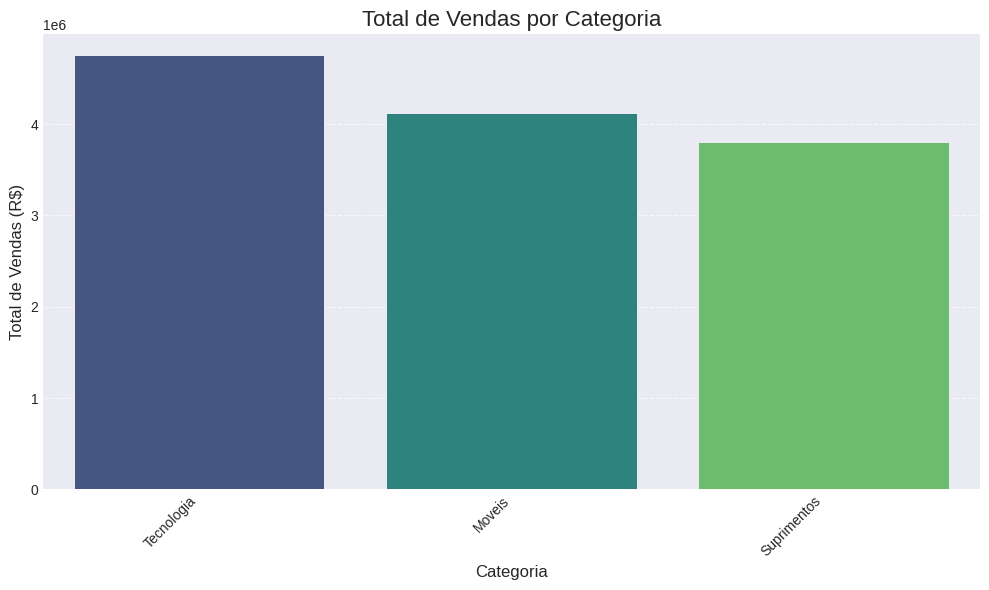

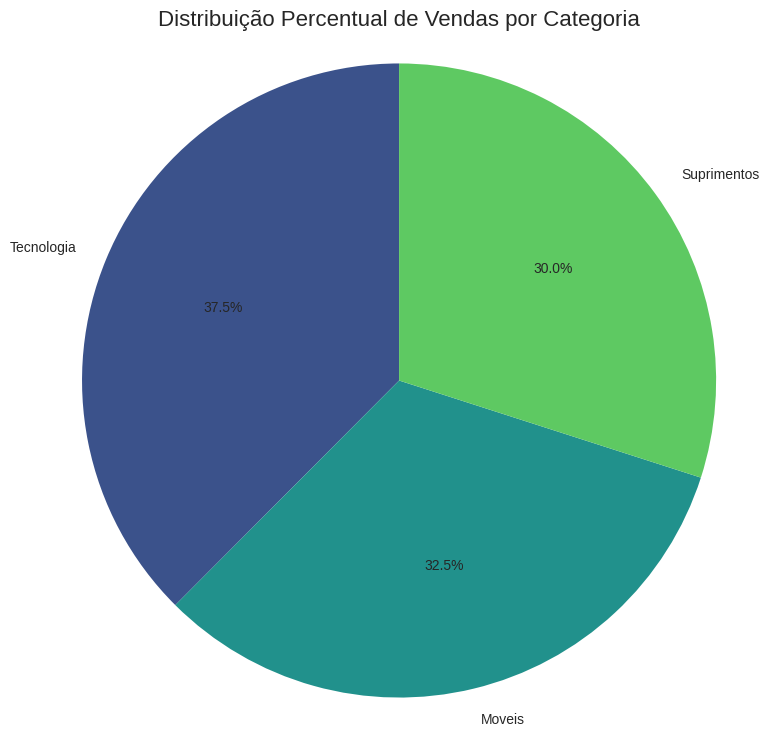

In [9]:
print("\n" + "="*50)
print("Iniciando Etapa 4: Visualização de Dados")
print("="*50)

# Configurações básicas para os gráficos
plt.style.use('seaborn-v0_8-darkgrid') # Estilo de gráfico
plt.rcParams['figure.figsize'] = (12, 7) # Tamanho padrão das figuras

# 1. Total de Vendas por Categoria:
print("\n- 1. Gráfico de Total de Vendas por Categoria ---")
vendas_por_categoria = df_limpo.groupby('categoria') ['total_vendas'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=vendas_por_categoria.index, y=vendas_por_categoria.values, palette='viridis')
plt.title('Total de Vendas por Categoria', fontsize=16)
plt.xlabel('Categoria', fontsize=12)
plt.ylabel('Total de Vendas (R$)', fontsize=12)
plt.xticks (rotation=45, ha='right') # Rotaciona os rótulos do eixo X para melhor leitura
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout() # Ajusta o layout para evitar sobreposição
plt.show()

# Se preferir um gráfico de pizza para mostrar a distribuição:
plt.figure(figsize=(9, 9))
plt.pie(vendas_por_categoria, labels=vendas_por_categoria.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis', len(vendas_por_categoria)))
plt.title('Distribuição Percentual de Vendas por Categoria', fontsize=16)
plt.axis('equal') # Garante que o gráfico de pizza seja um circulo
plt.show()